<a href="https://colab.research.google.com/github/ugr-gowthamraj/Simple-Loan-Prediction-Model-Using-Python/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the required libraries

In [1]:
import matplotlib.pyplot as plt                                                 #for visualization
import numpy as np                                                              #for arrays
import pandas as pd                                                             #for dataframe
from sklearn.linear_model import LogisticRegression                             #for logistic regression model
from sklearn.linear_model import LinearRegression                               #for linear regression model
from sklearn.metrics import classification_report, confusion_matrix             #for getting report and confusion matrix
from google.colab import files                                                  #for uploading files to colab
import io                                                                       #for uploading files to colab
#from sklearn import preprocessing                                               #for normalization if needed

#Uploading the dataset and storing it in the dataframe

In [2]:
uploaded = files.upload()

Saving Loan prediction dataset.csv to Loan prediction dataset.csv


In [3]:
dataset = pd.read_csv(io.BytesIO(uploaded['Loan prediction dataset.csv'])) 
print(dataset)

    Age   Income Employee Credit_Rating Buys_Loan
0    28  2400000       no          fair        no
1    27  2600000       no     excellent        no
2    38  2800000       no          fair       yes
3    49  1600000       no          fair       yes
4    48   800000      yes          fair       yes
5    49   900000      yes     excellent        no
6    36   600000      yes     excellent       yes
7    26  1800000       no          fair        no
8    24   700000      yes          fair       yes
9    51  1400000      yes          fair       yes
10   26  1600000      yes     excellent       yes
11   39  1700000       no     excellent       yes
12   40  3200000      yes          fair       yes
13   50  1600000       no     excellent        no


#Data Preprocessing

Age, Income, Employee, Credit_Rating are the Independent variables</br>
Buys_Loan is the dependent variable</br>
Age, Income are Continuous variables and Employee, Credit_Rating, Buys_Loan are Categorical variables</br>
Employee Status: Yes --> 1; No --> 0</br>
Credit_Rating:   Fair -->0; Excellent -->1</br>
Buys_Loan:      Yes --> 1; No --> 0

In [7]:
dataset['Employee'] = dataset['Employee'].replace(['no','yes'],[0,1])
dataset['Buys_Loan'] = dataset['Buys_Loan'].replace(['no','yes'],[0,1])
dataset['Credit_Rating'] = dataset['Credit_Rating'].replace(['fair','excellent'],[0,1])
print(dataset)

    Age   Income  Employee  Credit_Rating  Buys_Loan
0    28  2400000         0              0          0
1    27  2600000         0              1          0
2    38  2800000         0              0          1
3    49  1600000         0              0          1
4    48   800000         1              0          1
5    49   900000         1              1          0
6    36   600000         1              1          1
7    26  1800000         0              0          0
8    24   700000         1              0          1
9    51  1400000         1              0          1
10   26  1600000         1              1          1
11   39  1700000         0              1          1
12   40  3200000         1              0          1
13   50  1600000         0              1          0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            14 non-null     int64
 1   Income         14 non-null     int64
 2   Employee       14 non-null     int64
 3   Credit_Rating  14 non-null     int64
 4   Buys_Loan      14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [14]:
dataset['Buys_Loan']=pd.Categorical(dataset.Buys_Loan)
dataset['Employee']=pd.Categorical(dataset.Employee)
dataset['Credit_Rating']=pd.Categorical(dataset.Credit_Rating)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            14 non-null     int64   
 1   Income         14 non-null     int64   
 2   Employee       14 non-null     category
 3   Credit_Rating  14 non-null     category
 4   Buys_Loan      14 non-null     category
dtypes: category(3), int64(2)
memory usage: 682.0 bytes


In [16]:
dataset.describe()

,Age,Income
count,14.000000,1.400000e+01
mean,37.928571,1.692857e+06
std,10.261686,8.109484e+05
min,24.000000,6.000000e+05
25%,27.250000,1.025000e+06
50%,38.500000,1.600000e+06
75%,48.750000,2.250000e+06
max,51.000000,3.200000e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58aebf1310>,
      dtype=object)

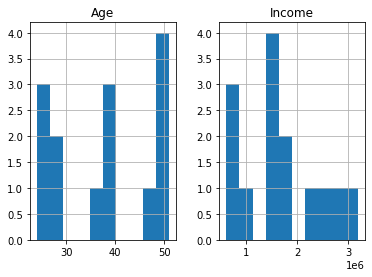

In [21]:
dataset.hist()

#Independent & Dependent Variables

In [18]:
x=dataset.iloc[:,:4].values
y=dataset.iloc[:,4:5].values

In [19]:
x

array([[     28, 2400000,       0,       0],
       [     27, 2600000,       0,       1],
       [     38, 2800000,       0,       0],
       [     49, 1600000,       0,       0],
       [     48,  800000,       1,       0],
       [     49,  900000,       1,       1],
       [     36,  600000,       1,       1],
       [     26, 1800000,       0,       0],
       [     24,  700000,       1,       0],
       [     51, 1400000,       1,       0],
       [     26, 1600000,       1,       1],
       [     39, 1700000,       0,       1],
       [     40, 3200000,       1,       0],
       [     50, 1600000,       0,       1]])

In [20]:
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

#Linear Regression Model

In [44]:
lr_model=LinearRegression().fit(x,y)
print("Slopes/Coefficients:",lr_model.coef_)
print("Intercept:",lr_model.intercept_)

Slopes/Coefficients: [[ 4.49399253e-03  1.30374642e-08  4.27528670e-01 -2.44850857e-01]]
Intercept: [0.34150761]


##Actual vs Predicted 

In [58]:
lr_predict=np.append(y,lr_model.predict(x),axis=1)
print(lr_predict)
#print("Predicted value:\n",lr_model.predict(x),'\n\nActual value:\n',y)

[[0.         0.49862931]
 [0.         0.25189196]
 [1.         0.54878422]
 [1.         0.58257319]
 [1.         0.99517789]
 [0.         0.75612477]
 [1.         0.69379163]
 [0.         0.48181885]
 [1.         0.88601832]
 [1.         1.01648235]
 [1.         0.66188917]
 [1.         0.29408615]
 [1.         0.99051586]
 [0.         0.34221632]]


##Evaluation

In [43]:
print("R^2 value:",lr_model.score(x,y))

R^2 value: 0.27489917793392693


This model shows low level of correlation. So going with Logistic regression

#Logistic Regression

##Model 1

In [45]:
log_model1=LogisticRegression().fit(x,y)
print("Coefficients:",log_model1.coef_)
print("Intercept:",log_model1.intercept_)

Coefficients: [[ 3.08823644e-10  2.14297518e-07  1.56709490e-11 -3.65010189e-12]]
Intercept: [5.94470757e-12]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Probability of prediction

In [47]:
log_model1.predict_proba(x)

array([[0.37418276, 0.62581724],
       [0.3642017 , 0.6357983 ],
       [0.35433613, 0.64566387],
       [0.41511102, 0.58488898],
       [0.45724516, 0.54275484],
       [0.45193197, 0.54806803],
       [0.46789958, 0.53210042],
       [0.4047443 , 0.5952557 ],
       [0.4625681 , 0.5374319 ],
       [0.42555344, 0.57444656],
       [0.41511102, 0.58488898],
       [0.40991766, 0.59008234],
       [0.33497871, 0.66502129],
       [0.41511102, 0.58488898]])

###Actual vs Predicted

In [64]:
log_pred_y=np.reshape(log_model1.predict(x),(len(y),1))
log_model1_predict=np.append(y,log_pred_y,axis=1)
print(log_model1_predict)

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]]


###Evaluating Loigistic Regression Model1

In [65]:
print("R^2 value:",log_model1.score(x,y))

R^2 value: 0.6428571428571429


####Confusion Matrix

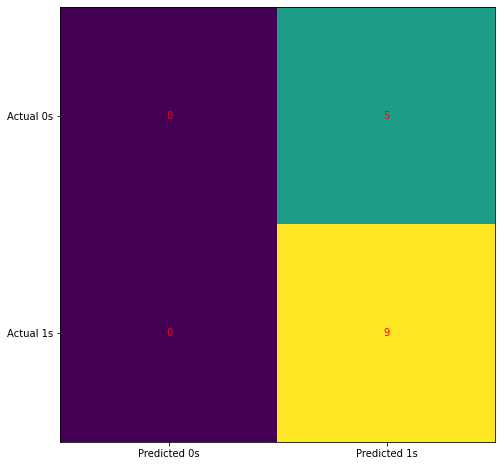

In [73]:
cm = confusion_matrix(y, log_model1.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


####Classification Report

In [67]:
print(classification_report(y, log_model1.predict(x)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Note: </br>0.64 or 64% Accuracy is a fair. Let us try the same with different solver to increase the score.

##Model 2

In [68]:
log_model2= LogisticRegression(solver='newton-cg', multi_class='multinomial',random_state=0,fit_intercept =True,dual=False,penalty ='none').fit(x,y)
print("Coefficients:",log_model2.coef_)
print("Intercept:",log_model2.intercept_)

Coefficients: [[ 1.86209941e-02  1.47354082e-07  1.28214823e+00 -7.20418614e-01]]
Intercept: [-0.84441821]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


###Probability of Prediction

In [69]:
log_model2.predict_proba(x)

array([[0.48469507, 0.51530493],
       [0.79541798, 0.20458202],
       [0.36550673, 0.63449327],
       [0.35261735, 0.64738265],
       [0.05221084, 0.94778916],
       [0.17876788, 0.82123212],
       [0.27845078, 0.72154922],
       [0.54737497, 0.45262503],
       [0.12179257, 0.87820743],
       [0.03964292, 0.96035708],
       [0.2943297 , 0.7056703 ],
       [0.76426967, 0.23573033],
       [0.03529076, 0.96470924],
       [0.68912701, 0.31087299]])

###Actual vs Predicted

In [71]:
log_pred_y2=np.reshape(log_model2.predict(x),(len(y),1))
log_model2_predict=np.append(y,log_pred_y2,axis=1)
print(log_model2_predict)

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]]


###Evaluating Logistic Regression Model2

In [72]:
print("R^2 value:",log_model2.score(x,y))

R^2 value: 0.7857142857142857


####Confusion Matrix

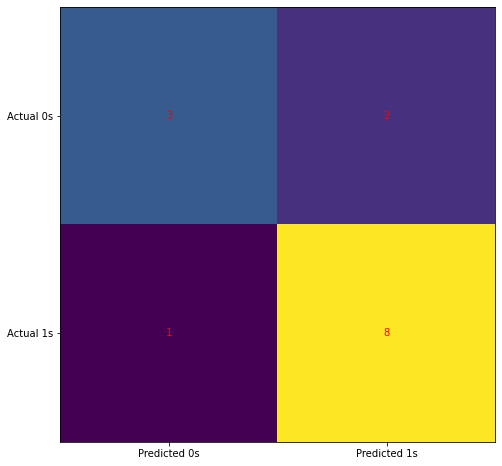

In [74]:
cm = confusion_matrix(y, log_model2.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


####Classification Report

In [75]:
print(classification_report(y, log_model2.predict(x)))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      0.89      0.84         9

    accuracy                           0.79        14
   macro avg       0.78      0.74      0.75        14
weighted avg       0.78      0.79      0.78        14



###Note:</br>Model2 gives 0.79 or 79% Accuracy. Better compared to Model1

*   By using newton-cg solver and multi class as multinomial, we attain better accuracy. 
*   In newton-cg solver the inputs are normalized(l2 normalization).



#Choosing Model for predicting new customer

Linear Regression Model--> 0.27</br>
Logistic Regression Model1--> 0.64</br>
**Logistic Regression Model2 --> 0.78**</br>
Wise to choose Logistic Regression Model2 to predict whether the customer buy the product or not.


#Prediction

In [77]:
#Age=25; Income=1500000; Employee=1(yes); Credit_Rating=0(fair) --> 25,1500000,1,0
new_x=[[25,1500000,1,0]]
print(log_model2.predict(new_x))
print(log_model2.predict_proba(new_x))

[1]
[[0.09547271 0.90452729]]


 **1 implies customer would take up the loan.</br>
Model states the probability of that customer to take up loan is 90.45%.**